In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Loading data
(x_train,_),(x_test,_)=mnist.load_data()
x_train = x_train/255.
x_test = x_test/255.
x_train = np.reshape(x_train,(len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
#Adding noise
noise_factor = 0.5

x_train_noise=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noise=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train_noise=np.clip(x_train_noise, 0., 1.)
x_test_noise=np.clip(x_test_noise, 0., 1.)

In [6]:
a=np.random.normal(loc=0.0, scale=1.0, size=100)
a

array([-1.39596858, -0.07306287,  0.24185921, -1.43565263, -0.31507336,
        0.89815733,  1.157259  , -0.11854565,  0.92360492, -0.10943896,
       -0.67321191, -0.75062719, -0.42382601,  0.9721812 , -0.13706844,
       -0.84546205, -0.73281456,  0.33120203, -0.48288007,  0.08766877,
       -1.23410037,  0.72873548, -0.85369784,  0.39722364, -0.15284284,
       -0.84089322, -0.11628302, -0.84284587, -0.15232339, -0.69930398,
        0.24687129,  1.40461504, -0.53012673,  0.34452211, -0.77351898,
       -1.27244442,  0.42220009,  0.16620501, -0.41900579,  0.03993709,
        2.09904681,  0.88329482,  0.37413936,  0.85012233,  0.5391569 ,
        0.23342209,  0.56010848,  1.02966072, -1.9792535 , -0.12655344,
        0.20379814,  0.43007481, -0.26390705, -0.60033369,  1.16396949,
        0.072502  , -2.18231061,  0.28625686, -0.74747603, -1.24681526,
       -2.1100515 , -0.99303712,  0.71330313, -1.67230587,  2.22262704,
       -0.2278582 ,  0.09417373, -1.36760231, -0.63591517,  0.08

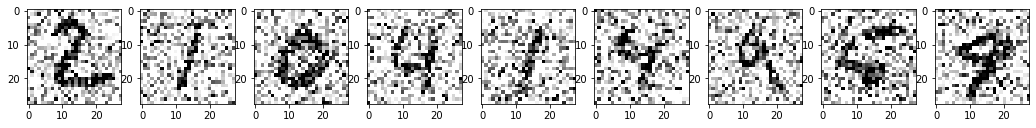

In [9]:
plt.figure(figsize=(20,2))
for i in range (1, 10):
  ax = plt.subplot(1, 10, i)
  plt.imshow(x_test_noise[i].reshape(28,28), cmap='binary')
plt.show()

In [18]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu', padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1,(3,3),activation='relu',padding='same'))

model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 8)         

In [20]:
model.fit(x_train_noise, x_train, epochs=10, batch_size=256,
          shuffle=True, validation_data=(x_test_noise,x_test))

Epoch 1/10
235/235 [==============================] - 75s 313ms/step - loss: 0.0526 - val_loss: 0.0382
Epoch 2/10
235/235 [==============================] - 74s 317ms/step - loss: 0.0357 - val_loss: 0.0330
Epoch 3/10
235/235 [==============================] - 74s 314ms/step - loss: 0.0318 - val_loss: 0.0300
Epoch 4/10
235/235 [==============================] - 74s 314ms/step - loss: 0.0296 - val_loss: 0.0284
Epoch 5/10
235/235 [==============================] - 75s 318ms/step - loss: 0.0281 - val_loss: 0.0275
Epoch 6/10
235/235 [==============================] - 74s 315ms/step - loss: 0.0270 - val_loss: 0.0266
Epoch 7/10
235/235 [==============================] - 74s 314ms/step - loss: 0.0261 - val_loss: 0.0252
Epoch 8/10
235/235 [==============================] - 84s 357ms/step - loss: 0.0252 - val_loss: 0.0244
Epoch 9/10
235/235 [==============================] - 95s 405ms/step - loss: 0.0246 - val_loss: 0.0241
Epoch 10/10
235/235 [==============================] - 103s 440ms/step - 

In [21]:
model.evaluate(x_test_noise, x_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0239


0.023929236456751823

In [22]:
no_noise_img=model.predict(x_test_noise)

313/313 [==============================] - 3s 11ms/step


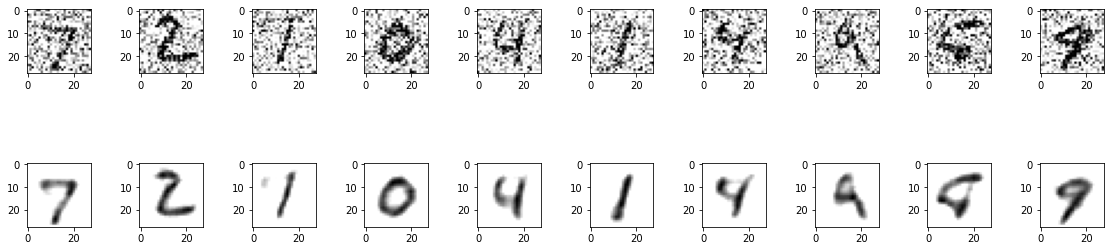

In [23]:
plt.figure(figsize=(40,4))
for i in range(10):
  
  #display original
  ax=plt.subplot(3, 20, i+1)
  plt.imshow(x_test_noise[i].reshape(28,28),cmap='binary')

  #display reconstructedimage
  ax=plt.subplot(3,20,40+i+1)
  plt.imshow(no_noise_img[i].reshape(28,28),cmap='binary')

plt.show()